Importación de librerías

In [1]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Antecedentes

* Tamaño del café: Pequeño, Mediano y Grande.


In [2]:
tamano = ctrl.Antecedent(np.arange(0, 600, 1), "Tamano")
tamano["Pequeno"] = fuzz.trimf(tamano.universe, [0, 0, 200])
tamano["Mediano"] = fuzz.trimf(tamano.universe, [150, 200, 400])
tamano["Grande"] = fuzz.trimf(tamano.universe, [350, 400, 600])

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


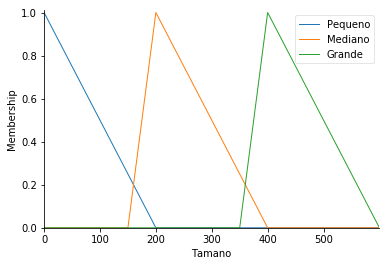

In [3]:
tamano.view()

[https://es.wikipedia.org/wiki/Temperatura_ambiente]

In [4]:
temperatura = ctrl.Antecedent(np.arange(0, 30, 1), "Temperatura")
temperatura["Frio"] = fuzz.trimf(temperatura.universe, [0, 0, 10])
temperatura["Calido"] = fuzz.trimf(temperatura.universe, [8, 15, 20])
temperatura["Caluroso"] = fuzz.trimf(temperatura.universe, [18, 25, 30])

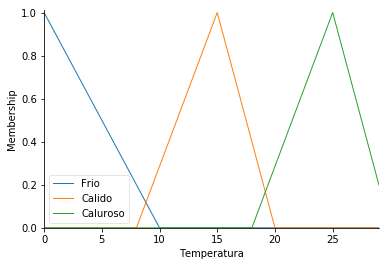

In [5]:
temperatura.view()

In [6]:
intensidad = ctrl.Antecedent(np.arange(0, 5.5, 0.5), "Intensidad")
intensidad["Suave"] = fuzz.trimf(intensidad.universe, [0, 0, 2])
intensidad["Medio"] = fuzz.trimf(intensidad.universe, [1.5, 2.5, 3.5])
intensidad["Fuerte"] = fuzz.trimf(intensidad.universe, [3, 4, 5])

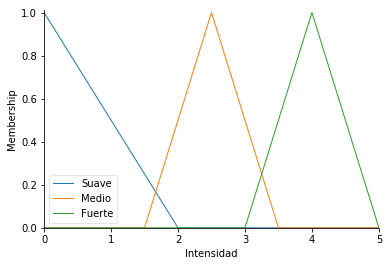

In [7]:
intensidad.view()

# Consecuentes

* Nivel de agua: Poca, Media y Mucha

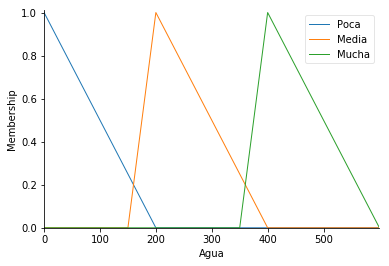

In [11]:
agua = ctrl.Consequent(np.arange(0, 600, 1), "Agua")
agua["Poca"] = fuzz.trimf(agua.universe, [0, 0, 200])
agua["Media"] = fuzz.trimf(agua.universe, [150, 200, 400])
agua["Mucha"] = fuzz.trimf(agua.universe, [350, 400, 600])
agua.view()

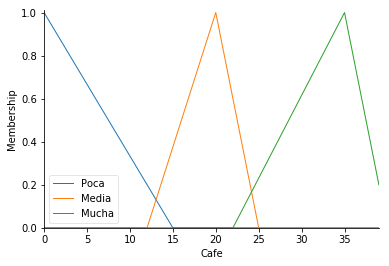

In [12]:
cafe = ctrl.Consequent(np.arange(0, 40, 1), "Cafe")
cafe["Poca"] = fuzz.trimf(cafe.universe, [0, 0, 15])
cafe["Media"] = fuzz.trimf(cafe.universe, [12, 20, 25])
cafe["Mucha"] = fuzz.trimf(cafe.universe, [22, 35, 40])
cafe.view()

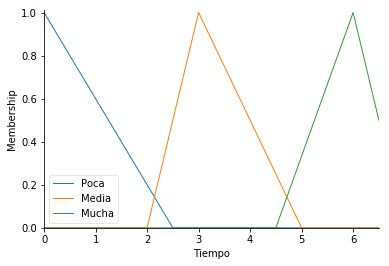

In [13]:
tiempo = ctrl.Consequent(np.arange(0, 7, 0.5), "Tiempo")
tiempo["Poca"] = fuzz.trimf(tiempo.universe, [0, 0, 2.5])
tiempo["Media"] = fuzz.trimf(tiempo.universe, [2, 3, 5])
tiempo["Mucha"] = fuzz.trimf(tiempo.universe, [4.5, 6, 7])
tiempo.view()

In [ ]:
leche = ctrl.Consequent(np.arange(0, 600, 1), "Leche")

In [ ]:
chocolate = ctrl.Consequent(np.arange(0, 600, 1), "Chocolate")

# Reglas

In [14]:
espresso = pd.read_csv(filepath_or_buffer="espresso.csv")
print(espresso)

    tamano temperatura intensidad   agua   cafe tiempo
0  Pequeno        Frio      Suave   Poca   Poca  Media
1  Pequeno      Calido     Fuerte   Poca  Media   Poca
2  Mediano      Calido      Medio  Media   Poca   Poca
3  Mediano    Caluroso     Fuerte  Media  Media   Poca
4   Grande        Frio      Suave  Mucha  Media  Media
5   Grande    Caluroso      Medio  Mucha  Media   Poca


In [29]:
reglasEspresso = []

for index, row in espresso.iterrows():
    #print(row)
    antecedente = tamano[row["tamano"]] & temperatura[row["temperatura"]] & intensidad[row["intensidad"]]
    consecuente = (agua[row["agua"]], cafe[row["cafe"]], tiempo[row["tiempo"]])
    regla  = ctrl.Rule(antecedente, consecuente)
    reglasEspresso.append(regla)

In [30]:
espressoCtrl = ctrl.ControlSystem(reglasEspresso)
preparacionEspresso = ctrl.ControlSystemSimulation(espressoCtrl)

In [31]:
size = input("Tamaño del cafe:" )
temperature = input("Temperatura ambiente:" )
intenity = input("Intensidad del café:" )

Tamaño del cafe:500
Temperatura ambiente:20
Intensidad del café:2


In [36]:
preparacionEspresso.input["Tamano"] = int(size)
preparacionEspresso.input["Temperatura"] = int(temperature)
preparacionEspresso.input["Intensidad"] = int(intenity)
preparacionEspresso.compute()

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


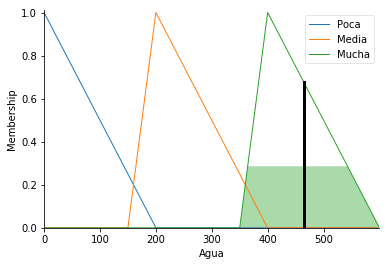

In [38]:
agua.view(sim = preparacionEspresso)

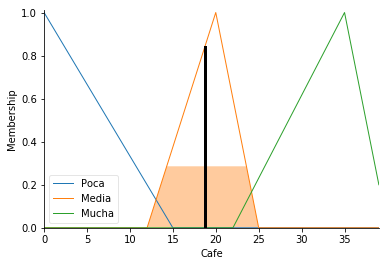

In [39]:
cafe.view(sim = preparacionEspresso)

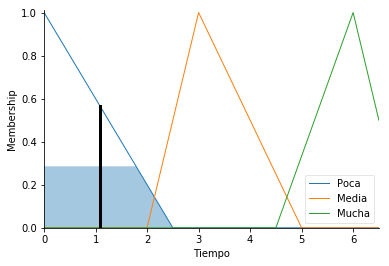

In [40]:
tiempo.view(sim = preparacionEspresso)

In [42]:
print("Agua (ml): {}".format(preparacionEspresso.output["Agua"]))
print("Café (gr): {}".format(preparacionEspresso.output["Cafe"]))
print("Tiempo (min): {}".format(preparacionEspresso.output["Tiempo"]))

Agua (ml): 464.87546201787444
Café (gr): 18.702380952380956
Tiempo (min): 1.0813492063492063


In [ ]:
capuccino = pd.read_csv(filepath_or_buffer="capuccino.csv")
print(capuccino)

In [ ]:
latte = pd.read_csv(filepath_or_buffer="latte.csv")
print(latte)

In [ ]:
mokaccino = pd.read_csv(filepath_or_buffer="mokaccino.csv")
print(mokaccino)